### MMDetection 설치
* 강의 영상에는 pip install mmcv-full로 mmcv를 설치(약 10분 정도의 시간이 소요)
* 실습코드는 pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html 로 변경(설치에 12초 정도 걸림). 

In [1]:
import torch
print(torch.__version__)

1.10.0+cu111


In [2]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 68.5 MB 233 kB/s 
     |████████████████████████████████| 190 kB 5.3 MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 23083, done.
remote: Total 23083 (delta 0), reused 0 (delta 0), pack-reused 23083
Receiving objects: 100% (23083/23083), 25.85 MiB | 26.23 MiB/s, done.
Resolving deltas: 100% (16150/16150), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_p

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

### PASCAL VOC형태의 BCCD Dataset를 Download 후 MS-COCO 형태로 변경
* BCCD Dataset은 백혈구(WBC), 적혈구(RBC), 혈소판(Platelets) 세가지 유형의 Object Class를 가짐.
* 다운로드 받은 Dataset은 Pascal VOC 형태이므로 이를 별도의 유틸리티를 이용하여 MS-COCO 형태로 변환 


In [2]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 7.39 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (378/378), done.


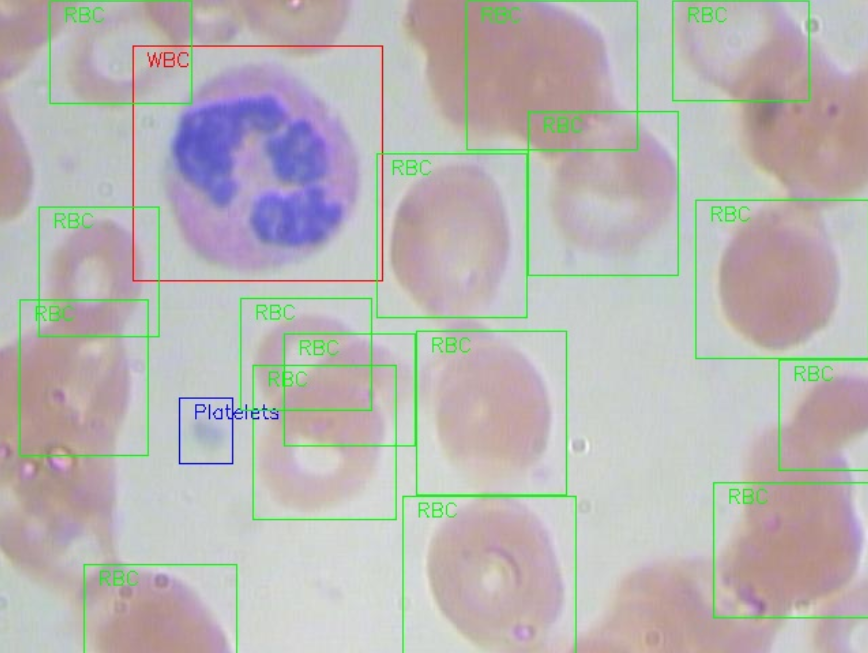

### VOC를 COCO로 변환하는 package적용하기

In [3]:
!git clone https://github.com/yukkyo/voc2coco.git

Cloning into 'voc2coco'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 423 (delta 3), reused 9 (delta 3), pack-reused 409
Receiving objects: 100% (423/423), 214.64 KiB | 3.77 MiB/s, done.
Resolving deltas: 100% (379/379), done.


https://github.com/yukkyo/voc2coco

1. Make labels.txt

In [4]:
import os

# colab 버전은 아래 명령어로 ballnfish_classes.txt 를 수정합니다. 
with open('/content/BCCD_Dataset/BCCD/labels.txt', "w") as f:
    f.write("WBC\n")
    f.write("RBC\n")
    f.write("Platelets\n")

!cat /content/BCCD_Dataset/BCCD/labels.txt

WBC
RBC
Platelets


In [5]:
# VOC를 COCO로 변환 수행. 학습/검증/테스트 용 json annotation을 생성. 
%cd voc2coco
!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/train.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/train.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/val.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/val.json \
--ext xml

!python voc2coco.py --ann_dir /content/BCCD_Dataset/BCCD/Annotations \
--ann_ids /content/BCCD_Dataset/BCCD/ImageSets/Main/test.txt \
--labels /content/BCCD_Dataset/BCCD/labels.txt \
--output /content/BCCD_Dataset/BCCD/test.json \
--ext xml

/content/voc2coco
Start converting !
100% 205/205 [00:00<00:00, 3645.91it/s]
Start converting !
100% 87/87 [00:00<00:00, 3831.70it/s]
Start converting !
100% 72/72 [00:00<00:00, 3290.19it/s]


In [6]:
!cat /content/BCCD_Dataset/BCCD/train.json

{"images": [{"file_name": "BloodImage_00001.jpg", "height": 480, "width": 640, "id": "BloodImage_00001"}, {"file_name": "BloodImage_00003.jpg", "height": 480, "width": 640, "id": "BloodImage_00003"}, {"file_name": "BloodImage_00004.jpg", "height": 480, "width": 640, "id": "BloodImage_00004"}, {"file_name": "BloodImage_00005.jpg", "height": 480, "width": 640, "id": "BloodImage_00005"}, {"file_name": "BloodImage_00006.jpg", "height": 480, "width": 640, "id": "BloodImage_00006"}, {"file_name": "BloodImage_00008.jpg", "height": 480, "width": 640, "id": "BloodImage_00008"}, {"file_name": "BloodImage_00009.jpg", "height": 480, "width": 640, "id": "BloodImage_00009"}, {"file_name": "BloodImage_00010.jpg", "height": 480, "width": 640, "id": "BloodImage_00010"}, {"file_name": "BloodImage_00012.jpg", "height": 480, "width": 640, "id": "BloodImage_00012"}, {"file_name": "BloodImage_00013.jpg", "height": 480, "width": 640, "id": "BloodImage_00013"}, {"file_name": "BloodImage_00020.jpg", "height": 

In [7]:
# annotation json 파일을 잘 볼수 있는 jq 유틸리티 셋업. 
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [10]:
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json
!head -100 output.json

{
  "images": [
    {
      "file_name": "BloodImage_00001.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00001"
    },
    {
      "file_name": "BloodImage_00003.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00003"
    },
    {
      "file_name": "BloodImage_00004.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00004"
    },
    {
      "file_name": "BloodImage_00005.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00005"
    },
    {
      "file_name": "BloodImage_00006.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00006"
    },
    {
      "file_name": "BloodImage_00008.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00008"
    },
    {
      "file_name": "BloodImage_00009.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00009"
    },
    {
      "file_name": "BloodImage_00010.jpg",
      "height": 480,
      "width": 640

In [11]:
!jq . /content/BCCD_Dataset/BCCD/train.json > output.json
!tail -100 output.json

      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2800
    },
    {
      "area": 9405,
      "iscrowd": 0,
      "bbox": [
        102,
        0,
        99,
        95
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2801
    },
    {
      "area": 7128,
      "iscrowd": 0,
      "bbox": [
        197,
        0,
        88,
        81
      ],
      "category_id": 2,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2802
    },
    {
      "area": 756,
      "iscrowd": 0,
      "bbox": [
        0,
        280,
        21,
        36
      ],
      "category_id": 3,
      "ignore": 0,
      "segmentation": [],
      "image_id": "BloodImage_00408",
      "id": 2803
    },
    {
      "area": 1302,
      "iscrowd": 0,
      "bbox": [
        382,
        253,
        42,
        31
      ],
   

In [12]:
!jq . /content/BCCD_Dataset/BCCD/test.json > output.json
!cat output.json

{
  "images": [
    {
      "file_name": "BloodImage_00007.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00007"
    },
    {
      "file_name": "BloodImage_00011.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00011"
    },
    {
      "file_name": "BloodImage_00015.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00015"
    },
    {
      "file_name": "BloodImage_00016.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00016"
    },
    {
      "file_name": "BloodImage_00018.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00018"
    },
    {
      "file_name": "BloodImage_00019.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00019"
    },
    {
      "file_name": "BloodImage_00021.jpg",
      "height": 480,
      "width": 640,
      "id": "BloodImage_00021"
    },
    {
      "file_name": "BloodImage_00031.jpg",
      "height": 480,
      "width": 640

MMDetection에서 json에 있는 categories에서 클래스를 가져다 쓰지 않음

### CocoDataset 클래스를 활용하여 BCCD Dataset을 로딩하기
* MS-COCO Dataset의 경우 별다른 Custom Code없이 Object들의 Class만 지정해 주면 됨

In [13]:
%cd /content

/content


In [14]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True)
class BCCDDataset(CocoDataset):
  CLASSES = ('WBC', 'RBC', 'Platelets') 

  # 단일 클래스일 때는 
#   CLASSES = ('WBC',) 2차원이라고 표시를 해줘야함.

### Config 설정하고 Checkpoint 파일 다운로드 받기

In [15]:
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [16]:
!pwd

/content


In [17]:
!cd /content/mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-02-16 06:55:38--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  7.98MB/s    in 20s     

2022-02-16 06:55:59 (7.98 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [18]:
!ls -lia /content/mmdetection/checkpoints

total 163376
5247771 drwxr-xr-x  2 root root      4096 Feb 16 06:55 .
5242886 drwxr-xr-x 19 root root      4096 Feb 16 06:55 ..
5247772 -rw-r--r--  1 root root 167287506 Nov  2 16:15 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [19]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [20]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'  # 앞에서는 meta file이였고 여기선 진짜 Annotation 파일
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3

# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

In [21]:
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### Dataset을 만들고, 모델 학습 및 Inference 적용

In [22]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성. 
datasets = [build_dataset(cfg.data.train)]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [25]:
print(datasets[0])
# datasets[0].__dict__ 로 모든 self variables의 key와 value값을 볼 수 있음. 
datasets[0].__dict__.keys()


BCCDDataset Train dataset with number of images 205, and instance counts: 
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
| category | count | category | count | category      | count | category | count | category | count |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+
|          |       |          |       |               |       |          |       |          |       |
| 0 [WBC]  | 214   | 1 [RBC]  | 2382  | 2 [Platelets] | 209   |          |       |          |       |
+----------+-------+----------+-------+---------------+-------+----------+-------+----------+-------+


dict_keys(['ann_file', 'data_root', 'img_prefix', 'seg_prefix', 'proposal_file', 'test_mode', 'filter_empty_gt', 'CLASSES', 'file_client', 'coco', 'cat_ids', 'cat2label', 'img_ids', 'data_infos', 'proposals', 'flag', 'pipeline'])

In [26]:
datasets[0].data_infos

[{'file_name': 'BloodImage_00001.jpg',
  'filename': 'BloodImage_00001.jpg',
  'height': 480,
  'id': 'BloodImage_00001',
  'width': 640},
 {'file_name': 'BloodImage_00003.jpg',
  'filename': 'BloodImage_00003.jpg',
  'height': 480,
  'id': 'BloodImage_00003',
  'width': 640},
 {'file_name': 'BloodImage_00004.jpg',
  'filename': 'BloodImage_00004.jpg',
  'height': 480,
  'id': 'BloodImage_00004',
  'width': 640},
 {'file_name': 'BloodImage_00005.jpg',
  'filename': 'BloodImage_00005.jpg',
  'height': 480,
  'id': 'BloodImage_00005',
  'width': 640},
 {'file_name': 'BloodImage_00006.jpg',
  'filename': 'BloodImage_00006.jpg',
  'height': 480,
  'id': 'BloodImage_00006',
  'width': 640},
 {'file_name': 'BloodImage_00008.jpg',
  'filename': 'BloodImage_00008.jpg',
  'height': 480,
  'id': 'BloodImage_00008',
  'width': 640},
 {'file_name': 'BloodImage_00009.jpg',
  'filename': 'BloodImage_00009.jpg',
  'height': 480,
  'id': 'BloodImage_00009',
  'width': 640},
 {'file_name': 'BloodImage_

In [27]:
datasets[0].pipeline

Compose(
    LoadImageFromFile(to_float32=False, color_type='color', file_client_args={'backend': 'disk'})
    LoadAnnotations(with_bbox=True, with_label=True, with_mask=False, with_seg=False, poly2mask=True, poly2mask={'backend': 'disk'})
    Resize(img_scale=[(1333, 800)], multiscale_mode=range, ratio_range=None, keep_ratio=True, bbox_clip_border=True)
    RandomFlip(flip_ratio=0.5)
    Normalize(mean=[123.675 116.28  103.53 ], std=[58.395 57.12  57.375], to_rgb=True)
    Pad(size=None, size_divisor=32, pad_to_square=False, pad_val={'img': 0, 'masks': 0, 'seg': 255})
    DefaultFormatBundle(img_to_float=True)
    Collect(keys=['img', 'gt_bboxes', 'gt_labels'], meta_keys=('filename', 'ori_filename', 'ori_shape', 'img_shape', 'pad_shape', 'scale_factor', 'flip', 'flip_direction', 'img_norm_cfg'))
)

In [29]:
# 빈 모델을 만드는 느낌 build_detector이지만 Pretrained 된 모델
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES
print(model.CLASSES)

('WBC', 'RBC', 'Platelets')


In [30]:
import os.path as osp
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-02-16 07:09:57,299 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2022-02-16 07:09:57,443 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2022-02-16 07:09:57,448 - mmdet - INFO - Start running, host: root@f2464218657a, 

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-02-16 07:10:03,580 - mmdet - INFO - Epoch [1][10/103]	lr: 2.500e-03, eta: 0:12:20, time: 0.604, data_time: 0.241, memory: 3168, loss_rpn_cls: 0.1540, loss_rpn_bbox: 0.0885, loss_cls: 0.8362, acc: 66.1035, loss_bbox: 0.7978, loss: 1.8765
2022-02-16 07:10:06,870 - mmdet - INFO - Epoch [1][20/103]	lr: 2.500e-03, eta: 0:09:27, time: 0.329, data_time: 0.016, memory: 3168, loss_rpn_cls: 0.0346, loss_rpn_bbox: 0.0687, loss_cls: 0.4909, acc: 84.0430, loss_bbox: 0.6162, loss: 1.2104
2022-02-16 07:10:10,138 - mmdet - INFO - Epoch [1][30/103]	lr: 2.500e-03, eta: 0:08:26, time: 0.327, data_time: 0.018, memory: 3168, loss_rpn_cls: 0.0184, loss_rpn_bbox: 0.0718, loss_cls: 0.3808, acc: 86.3281, loss_bbox: 0.4984, loss: 0.9694
2022-02-16 07:10:13,415 - mmdet - INFO - Epoch [1][40/103]	lr: 2.500e-03, eta: 0:07:54, time: 0.328, data_time: 0.019, memory: 3168, loss_rpn_cls: 0.0186, loss_rpn_bbox: 0.0794, loss_cls: 0.3510, acc: 85.4590, loss_bbox: 0.4367, loss: 0.8858
2022-02-16 07:10:16,698 - mmdet 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 87/87, 12.3 task/s, elapsed: 7s, ETA:     0s

2022-02-16 07:17:24,855 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-02-16 07:17:25,657 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.628
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.906
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.720
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.724
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.164
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.68s).
Accumulating evaluation results...
DONE (t=0.09s).


여기서 evaluation은 validation data로 수행했음

/usr/local/lib/python3.7/dist-packages/mmdet-2.21.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


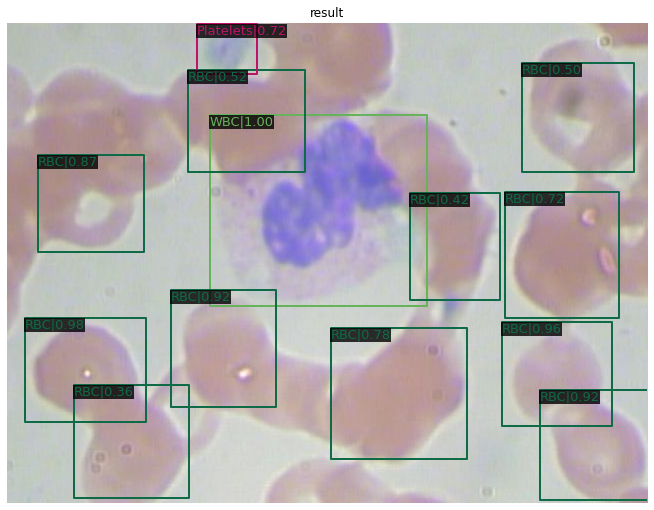

In [31]:
import cv2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00007.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

### 테스트 데이터 세트에 Inference 및 Evaluation 적용하기
* 런타임 다시 시작 수행 필요(버그?) --> 메모리를 한 번 날림
* tools/test.py 스크립트는 colab에서 오류 발생
* 테스트용 Dataset과 DataLoader생성하고 single_gpu_test()를 호출하여 inference 결과를 반환. batch_size를 1로 설정하지 않으면 single_gpu_test() 오류 발생. 

In [1]:
### 아래는 런타임 다시 시작 후 실행

from mmcv import Config
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmdet.apis import set_random_seed

# DATaset 만들기
@DATASETS.register_module(force=True) # 등록
class BCCDDataset(CocoDataset):
  CLASSES = ('WBC', 'RBC', 'Platelets') 

# Config 파일 
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'BCCDDataset'
cfg.data_root = '/content/BCCD_Dataset/BCCD/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'BCCDDataset'
cfg.data.train.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.train.ann_file = 'train.json'
cfg.data.train.img_prefix = 'JPEGImages'

cfg.data.val.type = 'BCCDDataset'
cfg.data.val.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.val.ann_file = 'val.json'
cfg.data.val.img_prefix = 'JPEGImages'

cfg.data.test.type = 'BCCDDataset'
cfg.data.test.data_root = '/content/BCCD_Dataset/BCCD/'
cfg.data.test.ann_file = 'test.json'
cfg.data.test.img_prefix = 'JPEGImages'

# class의 갯수 수정. 
cfg.model.roi_head.bbox_head.num_classes = 3

# pretrained 모델
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
 
# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정. 
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정. 
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = 'bbox'
cfg.evaluation.interval = 12
cfg.checkpoint_config.interval = 12

# bug(?)로 인해 test용 dataset evaluation 시 1로 설정. data loader에서 GPU갯수별 Batch size 임. 
cfg.data.samples_per_gpu = 1 # batch_size 결정 / default는 2 / sample : 이미지 개수

# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [2]:
# config 파일 생성

cfg.dump('/content/tutorial_exps/bccd_faster_rcnn_conf.py')

In [3]:
!mkdir -p /content/show_test_output

In [4]:
# tools/test.py 는 colab에서 제대로 동작하지 않음. 

%cd /content/mmdetection
!python tools/test.py /content/tutorial_exps/bccd_faster_rcnn_conf.py /content/tutorial_exps/epoch_12.pth \
--eval 'bbox' \
--show-dir /content/show_test_output

/content/mmdetection
/usr/local/lib/python3.7/dist-packages/mmdet-2.21.0-py3.7.egg/mmdet/utils/setup_env.py:33: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting OMP_NUM_THREADS environment variable for each process '
/usr/local/lib/python3.7/dist-packages/mmdet-2.21.0-py3.7.egg/mmdet/utils/setup_env.py:43: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  f'Setting MKL_NUM_THREADS environment variable for each process '
Traceback (most recent call last):
  File "tools/test.py", line 260, in <module>
    main()
  File "tools/test.py", line 199, in main
    dataset = build_dataset(cfg.data.test)
  File "/usr/local/lib/python3.7/dist-pa

### 테스트용 dataset와 dataloader를 별도로 설정하고 trained된 checkpoint 모델을 로딩하여 test 수행. 

In [5]:
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
# --> 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        samples_per_gpu=cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

# 반드시 아래 코드에서 'img' 키값이 tensor로 출력되어야 함. 
# 1건에 대한 tensor, sample per gpu (batch)를 1로 설정했기 때문
next(iter(data_loader))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


{'img': [tensor([[[[0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9474, 0.9474, 0.9474,  ..., 0.0000, 0.0000, 0.0000],
            [0.9646, 0.9646, 0.9646,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000],
            [1.1700, 1.1700, 1.1700,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2031, 1.2031, 1.2031,  ..., 0.0000, 0.0000, 0.0000],
            [1.2206, 1.2206, 1.2206,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000],
            [1.5007, 1.5007, 1.5007,  ..., 0.0000, 0.0000, 0.0000]],
  
           [[1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],
            [1.3851, 1.3851, 1.3851,  ..., 0.0000, 0.0000, 0.0000],

In [6]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

checkpoint_file = '/content/tutorial_exps/epoch_12.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/tutorial_exps/epoch_12.pth


In [7]:
from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot


model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.3)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 72/72, 3.9 task/s, elapsed: 18s, ETA:     0s

### batch 크기를 1보다 키우고 테스트 수행 하려면 
* 만일 batch size를 1보다 크게 해서 설정하려면 cfg.data.samples_per_gpu 값을 1보다 크게 설정하고 single_gpu_test() 함수의 bug(?) 코드를 수정 필요. 
* 다시 런타임 다시 시작을 실행 후 config 부터 재 설정후 아래 코드 수행 필요. 여기서는 수행하지 않는 걸로 스킵

In [ ]:
'''
import os.path as osp
import pickle
import shutil
import tempfile
import time

import mmcv
import torch
import torch.distributed as dist
from mmcv.image import tensor2imgs
from mmcv.runner import get_dist_info

def single_gpu_test_batch(model,
                    data_loader,
                    show=False,
                    out_dir=None,
                    show_score_thr=0.3):
    model.eval()
    results = []
    dataset = data_loader.dataset
    prog_bar = mmcv.ProgressBar(len(dataset))
    for i, data in enumerate(data_loader):
        with torch.no_grad():
            result = model(return_loss=False, rescale=True, **data)

        batch_size = len(result)
        if show or out_dir:
            if batch_size == 1 and isinstance(data['img'][0], torch.Tensor):
                img_tensor = data['img'][0]
            else:
                # 아래 코드를 주석 처리 필요. batch_size가 1보다 클때는 data['img'][0].data[0]가 아니라 data['img'][0].data 가 되어야 함. 
                #img_tensor = data['img'][0].data[0]
                # 아래는 버그(?) 수정 코드 
                img_tensor = data['img'][0].data
                print('img_tensor shape2:', img_tensor.shape)
            img_metas = data['img_metas'][0].data[0]
            imgs = tensor2imgs(img_tensor, **img_metas[0]['img_norm_cfg'])
            assert len(imgs) == len(img_metas)

            for i, (img, img_meta) in enumerate(zip(imgs, img_metas)):
                h, w, _ = img_meta['img_shape']
                img_show = img[:h, :w, :]

                ori_h, ori_w = img_meta['ori_shape'][:-1]
                img_show = mmcv.imresize(img_show, (ori_w, ori_h))

                if out_dir:
                    out_file = osp.join(out_dir, img_meta['ori_filename'])
                else:
                    out_file = None

                model.module.show_result(
                    img_show,
                    result[i],
                    show=show,
                    out_file=out_file,
                    score_thr=show_score_thr)

        # encode mask results
        if isinstance(result[0], tuple):
            result = [(bbox_results, encode_mask_results(mask_results))
                      for bbox_results, mask_results in result]
        results.extend(result)

        for _ in range(batch_size):
            prog_bar.update()
    return results

from mmdet.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
outputs = single_gpu_test(model_ckpt, data_loader, True, '/content/tutorial_exps', 0.3)
'''


### 반환된 test용 데이터세트의 inference 적용 결과 확인 및 성능 evaluation 수행. 

In [8]:
print('결과 outputs type:', type(outputs))
print('evalution 된 파일의 갯수:', len(outputs))
print('첫번째 evalutation 결과의 type:', type(outputs[0]))
print('첫번째 evaluation 결과의 CLASS 갯수:', len(outputs[0]))
print('첫번째 evaluation 결과의 CLASS ID 0의 type과 shape', type(outputs[0][0]), outputs[0][0].shape)

결과 outputs type: <class 'list'>
evalution 된 파일의 갯수: 72
첫번째 evalutation 결과의 type: <class 'list'>
첫번째 evaluation 결과의 CLASS 갯수: 3
첫번째 evaluation 결과의 CLASS ID 0의 type과 shape <class 'numpy.ndarray'> (1, 5)


1은 detect된 물체 개수

5는 좌표값과 confidence

In [9]:
print(outputs)

[[array([[202.47134  ,  92.038315 , 419.74115  , 283.355    ,   0.9975459]],
      dtype=float32), array([[1.7281116e+01, 2.9514105e+02, 1.3810931e+02, 3.9958307e+02,
        9.8314762e-01],
       [4.9428430e+02, 2.9950916e+02, 6.0431958e+02, 4.0393250e+02,
        9.6095085e-01],
       [1.6318477e+02, 2.6789502e+02, 2.6829877e+02, 3.8459363e+02,
        9.1947305e-01],
       [5.3225983e+02, 3.6772336e+02, 6.4000000e+02, 4.7711029e+02,
        9.1549397e-01],
       [3.0188038e+01, 1.3216260e+02, 1.3617517e+02, 2.2964297e+02,
        8.7274849e-01],
       [3.2323871e+02, 3.0513840e+02, 4.5936050e+02, 4.3622220e+02,
        7.7514285e-01],
       [4.9766956e+02, 1.6916469e+02, 6.1129584e+02, 2.9575305e+02,
        7.2493303e-01],
       [1.8086450e+02, 4.7199146e+01, 2.9764313e+02, 1.4974785e+02,
        5.2175701e-01],
       [5.1471802e+02, 4.0775547e+01, 6.2683026e+02, 1.4951978e+02,
        5.0090170e-01],
       [4.0227853e+02, 1.7044893e+02, 4.9209921e+02, 2.7716135e+02,
     

In [10]:
metric = dataset.evaluate(outputs, metric='bbox')
print(metric)


Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.58s).
Accumulating evaluation results...
DONE (t=0.07s).

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.925
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.615
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.512
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.476
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.719
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.719
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.719
 Average Recall     (AR) @[ IoU=0.50:0.95